In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from mpl_toolkits.mplot3d import Axes3D


In [84]:
cancer = load_breast_cancer()
cancer.keys()


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [39]:
X = pd.DataFrame(cancer.data, columns = cancer.feature_names)
Y = pd.DataFrame(cancer.target, columns = ['target'])
data = pd.concat([X, Y], axis=1)

In [40]:
correlation = data.corr('pearson')
abs(correlation['target']).sort_values()

symmetry error             0.006522
texture error              0.008303
mean fractal dimension     0.012838
smoothness error           0.067016
fractal dimension error    0.077972
concavity error            0.253730
compactness error          0.292999
worst fractal dimension    0.323872
mean symmetry              0.330499
mean smoothness            0.358560
concave points error       0.408042
mean texture               0.415185
worst symmetry             0.416294
worst smoothness           0.421465
worst texture              0.456903
area error                 0.548236
perimeter error            0.556141
radius error               0.567134
worst compactness          0.590998
mean compactness           0.596534
worst concavity            0.659610
mean concavity             0.696360
mean area                  0.708984
mean radius                0.730029
worst area                 0.733825
mean perimeter             0.742636
worst radius               0.776454
mean concave points        0

In [41]:
X = (X-X.min()) / (X.max()-X.min())

In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.3)
xtrain[]



In [44]:
f1 = 'worst concave points'
f2 = 'worst perimeter'
f3 = 'mean concave points'
basex = np.array(xtrain[[f1, f2, f3]])
basey = np.array(ytrain['target'])
xtest = np.array(xtest[[f1, f2, f3]])
ytest = np.array(ytest['target'])

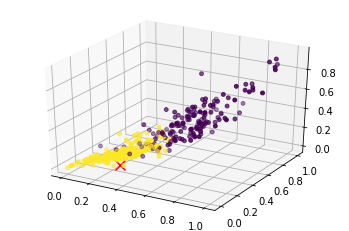

In [45]:
x = pd.DataFrame(basex)
y = basey

ax = plt.axes(projection='3d')
ax.scatter(x.iloc[:,0], x.iloc[:,1], x.iloc[:,2] ,c=y.ravel(), s=15)
ax.scatter(0.25, 0.2, c='r', marker='x', s=100)


In [46]:
k= np.sqrt(len(X))
k

23.853720883753127

In [47]:
def euclid_distance(train_point, given_point):
   
    distance = np.sum((train_point-given_point)**2)
   
    return np.sqrt(distance)

In [48]:
def calc_distance_from_all(all_points, given_point, predictions):
    all_distances = []
    for i, each in enumerate(all_points):
        distance = euclid_distance(each, given_point)
        all_distances.append((distance,int(predictions[i])))
    all_distances.sort(key=lambda tup: tup[0])
    return all_distances


In [49]:
def get_neighbours(distances, count):
    return distances[:count]


In [80]:
def predict(all_points, given_point, predictions):
    distances = calc_distance_from_all(all_points,given_point,predictions)
    neighbours = get_neighbours(distances, 22)
    
    op = [row[-1] for row in neighbours]
    prediction = max(set(op), key=op.count)
    return prediction

In [81]:
def accuracy(basex, basey, testx, testy):
    correct = 0 
    
    for i in range(len(testx)):
        p = predict(basex, testx[i], basey)
        if p == testy[i]:
            correct += 1
            
    return f"Accuracy: {correct*100/len(testy)}%"

In [82]:
print(accuracy(basex,basey,xtest,ytest))

Accuracy: 95.32163742690058%
